In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image 
from matplotlib import image as img
img = img.imread("./Image/avtCongSon.jpg")

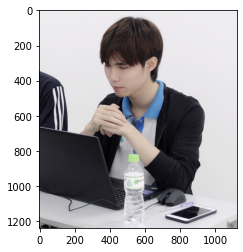

In [2]:
plt.imshow(img)

In [3]:
def nn(img, angle):
    radians = float(angle*(math.pi/180))
    w,h = img.shape[:2]

    x1= w*math.cos(radians)
    x2 = -h*math.sin(radians)

    y1= w*math.sin(radians) + h*math.cos(radians)

    x_new = int(math.fabs(x1)+ math.fabs(x2))+1
    y_new = int(math.fabs(y1))
    
    rotate_img = np.zeros((x_new,y_new,3),dtype = "float32")
    
    # ảnh RGB nên có 3 chiều
    for k in range(3):
        for i in range(x_new):
            for j in range(y_new):
                i_new = i + x2
                x = i_new*math.cos(radians) + j*math.sin(radians)
                y = -i_new*math.sin(radians) + j*math.cos(radians)        
                x_int = int(x)
                y_int= int(y)
                
                
                if(x<0) or (y<0) or (y>=h) or (x>=w):
                    intensity =0.0
                else:
                    
                
                    x_int = min(x_int, w-2)
                    y_int = min(y_int, h-2)
                    
            
                    x_diff = x - x_int
                    y_diff = y - y_int

                    # giá trị mới bằng những giá trị cũ tạo ra.
                    a = img[x_int, y_int,k]
                    b = img[x_int + 1, y_int,k]
                    c = img[x_int + 1, y_int+1,k]
                    d = img[x_int,y_int+1,k]
                    
                    value1 = a*(1-y_diff) + d*y_diff
                    value2 = b*(1-y_diff) + c*y_diff
                    
                    intensity = value2*x_diff + value1*(1-x_diff)
                
                rotate_img[i,j,k] = intensity

    return rotate_img

In [4]:
newImage = nn(img, 30)

In [ ]:
newImage.shape

(358, 428, 3)

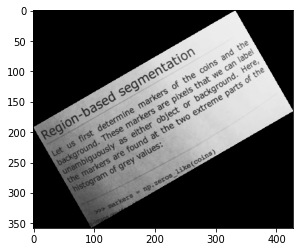

In [ ]:
plt.imshow(newImage, cmap="gray")